# Final Exam
## By Vyanna Hill

### Chapter 14 Exercise 1
Exercise: If we didn't know about contact numbers, we might have explored other possibilities, like the difference between beta and gamma, rather than their ratio.

Write a version of plot_sweep_frame, called plot_sweep_frame_difference, that plots the fraction infected versus the difference beta-gamma.

What do the results look like, and what does that imply?

9.211261    0.999900
4.642296    0.989902
3.987365    0.979904
3.612133    0.969906
3.350924    0.959908
              ...   
1.020598    0.040092
1.015356    0.030094
1.010185    0.020096
1.005083    0.010098
1.000050    0.000100
Length: 101, dtype: float64

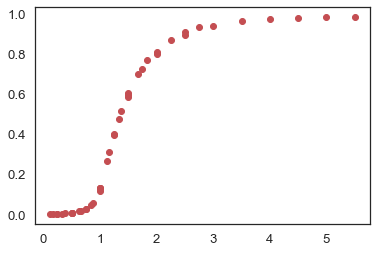

In [18]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=89, I=1, R=0)
    init /= np.sum(init)

    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    t: time
    system: System object
    
    returns: State (sir)
    """
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    init, t0, t_end = system.init, system.t0, system.t_end
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

def calc_total_infected(results):
    """Fraction of population infected during the simulation.
    
    results: DataFrame with columns S, I, R
    
    returns: fraction of population
    """
    return get_first_value(results.S) - get_last_value(results.S)

def sweep_beta(beta_array, gamma):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[system.beta] = calc_total_infected(results)
    return sweep
def sweep_parameters(beta_array, gamma_array):
    """Sweep a range of values for beta and gamma.
    
    beta_array: array of infection rates
    gamma_array: array of recovery rates
    
    returns: SweepFrame with one row for each beta
             and one column for each gamma
    """
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame

def plot_sweep_frame(frame):
    """Plot the values from a SweepFrame.
    
    For each (beta, gamma), compute the contact number,
    beta/gamma
    
    frame: SweepFrame with one row per beta, one column per gamma
    """
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            frac_infected = column[beta]
            plot(beta/gamma, frac_infected, 'ro')

beta_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 , 1.1]
gamma_array = [0.2, 0.4, 0.6, 0.8]
frame = sweep_parameters(beta_array, gamma_array)
frame.head()

plot_sweep_frame(frame)

s_inf_array = linspace(0.0001, 0.9999, 101);
c_array = log(s_inf_array) / (s_inf_array - 1);
frac_infected = 1 - s_inf_array
frac_infected_series = Series(frac_infected, index=c_array)



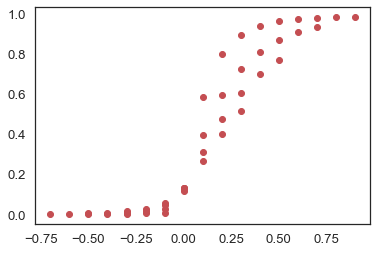

In [19]:
#just changing the equation to be beta-gamma to see the visual difference
def plot_sweep_frame_difference(frame):
     for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            frac_infected = column[beta]
            plot(beta-gamma, frac_infected, 'ro')
            
plot_sweep_frame_difference(frame)


The predict gave a wider area compared to the tight line the ratio gave  in the plot sweep. There would be more variance in the fraction prediction, which can make the contact number un-accurate.

### Chapter 14 Exercise 2

Exercise: Suppose you run a survey at the end of the semester and find that 26% of students had the Freshman Plague at some point.

What is your best estimate of c?

Hint: if you print frac_infected_series, you can read off the answer.

In [25]:
import pandas as pd

for x, y in frac_infected_series.iteritems():
    print(x, y)
    
print()

9.211261498125994 0.9999
4.642295797508655 0.989902
3.9873645670354945 0.979904
3.6121329929348316 0.969906
3.3509236987497943 0.959908
3.15180795192451 0.94991
2.9917110586931823 0.939912
2.8583634826236866 0.929914
2.7444670982705857 0.919916
2.6453316808223923 0.909918
2.5577667046220567 0.89992
2.4795050280438127 0.889922
2.408878952429612 0.879924
2.3446267380302497 0.869926
2.2857712539400064 0.859928
2.2315407469723847 0.8499300000000001
2.1813153374740213 0.839932
2.1345898372419727 0.829934
2.0909472638489692 0.819936
2.050039563845128 0.809938
2.0115733147799864 0.79994
1.9752989408362212 0.789942
1.941002456030725 0.779944
1.9084990570863016 0.769946
1.877628090925052 0.7599480000000001
1.8482490580935054 0.74995
1.8202384068443858 0.7399519999999999
1.793486937703986 0.729954
1.767897684443758 0.719956
1.7433841704747504 0.7099580000000001
1.7198689637703604 0.69996
1.6972824711653356 0.689962
1.6755619260961099 0.679964
1.6546505337969954 0.6699660000000001
1.6344967455295

If 26% of the frehman class caught the plague, the closet contact number estimate is 1.1581321900287747 or ~1.16.